<a href="https://colab.research.google.com/github/kalyankalluri999/Academic-Projects/blob/main/Coursework_2_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
import random
import tarfile
import multiprocessing as mp
import seaborn as sns
import tqdm
import requests
import sklearn.model_selection as skms
import torch
import torch.utils.data as td
import torch.nn.functional as F
import torchvision as tv
import torchvision.transforms.functional as TF
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pandas import DataFrame, Series
from PIL import Image
import imageio
#Import data from drive
from google.colab import drive
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
#from keras.layers.normalization import BatchNormalization
#from tensorflow.keras.layers import BatchNormalization

# define constants
#DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'
#OUT_DIR = 'results'
#RANDOM_SEED = 42

In [29]:
path= '/content/drive/MyDrive/Link_2/List/file_list.mat'
path_train= '/content/drive/MyDrive/Link_2/List/train_list.mat'
path_test= '/content/drive/MyDrive/Link_2/List/test_list.mat'
fpath = "/content/drive/MyDrive/Link_2/images/"
random_seed = 42
categories = os.listdir(fpath)
categories = categories[:]
print("List of categories = ",categories,"\n\nNo. of categories = ", len(categories))

List of categories =  ['n02094258-Norwich_terrier', 'n02094433-Yorkshire_terrier', 'n02095314-wire-haired_fox_terrier', 'n02095570-Lakeland_terrier', 'n02095889-Sealyham_terrier', 'n02096051-Airedale', 'n02096177-cairn', 'n02096437-Dandie_Dinmont', 'n02096585-Boston_bull', 'n02097047-miniature_schnauzer', 'n02097130-giant_schnauzer', 'n02097298-Scotch_terrier', 'n02097474-Tibetan_terrier', 'n02097658-silky_terrier', 'n02098105-soft-coated_wheaten_terrier', 'n02098286-West_Highland_white_terrier', 'n02098413-Lhasa', 'n02099267-flat-coated_retriever', 'n02099429-curly-coated_retriever', 'n02099601-golden_retriever'] 

No. of categories =  20


In [32]:
def load_images_and_labels(categories):
    img_lst=[]
    labels=[]
    for index, category in enumerate(categories):
        for image_name in os.listdir(fpath + "/"+category):
            img = cv2.imread(fpath + "/"+category+"/"+image_name)
            imag = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_array = Image.fromarray(img, 'RGB')
            
#(To load the image, we simply import the image module from the pillow and call the Image.open(), passing the image filename.
#Instead of calling the Pillow module, we will call the PIL module as to make it backward compatible with an older module called Python Imaging Library (PIL). 
#That’s why our code starts with “from PIL import Image” instead of “from Pillow import Image”.)

            #"resize image to 227 x 227 because the input image resolution for AlexNet is 227 x 227"
            resized_img = img_array.resize((227, 227))
            
            img_lst.append(np.array(resized_img))
            
            labels.append(index)
    return img_lst, labels

images, labels = load_images_and_labels(categories)
print("No. of images loaded = ",len(images),"\nNo. of labels loaded = ",len(labels))
print(type(images),type(labels))

No. of images loaded =  3488 
No. of labels loaded =  3488
<class 'list'> <class 'list'>


In [24]:
images = np.array(images)
labels = np.array(labels)

print("Images shape = ",images.shape,"\nLabels shape = ",labels.shape)
print(type(images),type(labels))

Images shape =  (3488, 227, 227, 3) 
Labels shape =  (3488,)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


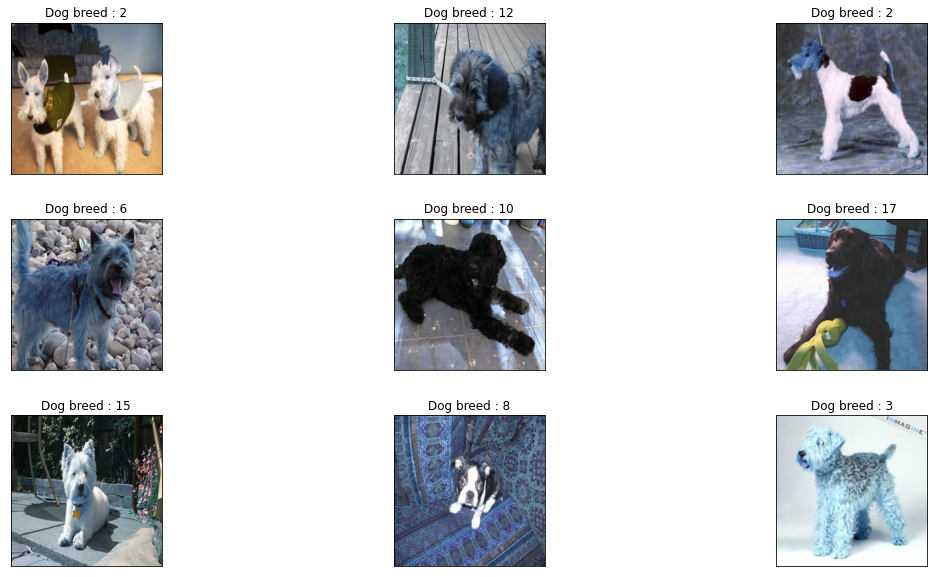

In [25]:
def display_rand_images(images, labels):
    plt.figure(1 , figsize = (19 , 10))
    n = 0 
    for i in range(9):
        n += 1 
        r = np.random.randint(0 , images.shape[0] , 1)
        
        plt.subplot(3 , 3 , n)
        plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
        plt.imshow(images[r[0]])
        
        plt.title('Dog breed : {}'.format(labels[r[0]]))
        plt.xticks([])
        plt.yticks([])
        
    plt.show()
    
display_rand_images(images, labels)

In [95]:
import scipy.io
data = scipy.io.loadmat(path)

df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
list1 = []
for i in data:
  if '__' not in i and 'readme' not in i:
    data_array = data[i]
    if df.empty:
      df = pd.DataFrame(data_array)

    elif df1.empty:
      df1 = pd.DataFrame(data_array)
    else:
      df2 = pd.DataFrame(data_array)

frames = [df, df2]

full_list = pd.concat(frames, axis=1)

#train_list = df
full_list.columns = ['File', 'Index']

full_list['File'] = full_list['File'].astype(str)
full_list['Breed'] = full_list['File'].str.split('-').str[1]
full_list['Breed'] = full_list['Breed'].str.split('/').str[0]

full_list['File'] = full_list['File'].str.split('[').str[1]
full_list['File'] = full_list['File'].str.split(']').str[0]
full_list['File'] = full_list['File'].str.strip("'")

In [96]:
# Training
data = scipy.io.loadmat(path_train)
df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
list1 = []

for i in data:
  if '__' not in i and 'readme' not in i:
    data_array = data[i]
    if df.empty:
      df = pd.DataFrame(data_array)
      list1.append(str(data_array).split("-"))

    elif df1.empty:
      df1 = pd.DataFrame(data_array)
    else:
      df2 = pd.DataFrame(data_array)
frames = [df, df2]
train_list = pd.concat(frames, axis=1)
#train_list = df
train_list.columns = ['File', 'Index']
train_list['File'] = train_list['File'].astype(str)
train_list['Breed'] = train_list['File'].str.split('-').str[1]
train_list['Breed'] = train_list['Breed'].str.split('/').str[0]
train_list['File'] = train_list['File'].str.split('[').str[1]
train_list['File'] = train_list['File'].str.split(']').str[0]
train_list['File'] = train_list['File'].str.strip("'")


In [97]:
# Test
data = scipy.io.loadmat(path_test)
df = pd.DataFrame()
df1 = pd.DataFrame()
df2 = pd.DataFrame()
for i in data:
  if '__' not in i and 'readme' not in i:
    data_array = data[i]
    if df.empty:
      df = pd.DataFrame(data_array)
    elif df1.empty:
      df1 = pd.DataFrame(data_array)
    else:
      df2 = pd.DataFrame(data_array)
frames = [df, df2]
test_list = pd.concat(frames, axis=1)
test_list.columns = ['File', 'Index']
test_list['File'] = test_list['File'].astype(str)
test_list['Breed'] = test_list['File'].str.split('-').str[1]
test_list['Breed'] = test_list['Breed'].str.split('/').str[0]
test_list['File'] = test_list['File'].str.split('[').str[1]
test_list['File'] = test_list['File'].str.split(']').str[0]
test_list['File'] = test_list['File'].str.strip("'")

print('Total')
print('There are ' + str(len(full_list.groupby('Breed'))) + ' breeds')
print('There are ' + str(sum(full_list['Breed'].value_counts())) + ' Images')

print('Train')
print('There are ' + str(len(train_list.groupby('Breed'))) + ' breeds')
print('There are ' + str(sum(train_list['Breed'].value_counts())) + ' Images')

print('Test')
print('There are ' + str(len(test_list.groupby('Breed'))) + ' breeds')
print('There are ' + str(sum(test_list['Breed'].value_counts())) + ' Images')

Total
There are 120 breeds
There are 20580 Images
Train
There are 120 breeds
There are 12000 Images
Test
There are 120 breeds
There are 8580 Images


**Create a data frame of the number of images per breed**

In [98]:
path = '/content/drive/MyDrive/Images'
mn = 20
d = pd.DataFrame()
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) and name.startswith("")]) # get all directories 
for folder in folders:
  contents = os.listdir(os.path.join(path,folder)) # get list of contents
  folder1 =folder.split("-",1)[1] 
  if len(contents) > mn: # if greater than the limit, print folder and number of contents
    temp = pd.DataFrame({'Dog': [folder1], 'Count': [len(contents)], })
    d = pd.concat([d, temp])
    print(folder1,len(contents))

curly-coated_retriever 151
golden_retriever 150
Labrador_retriever 171
Chesapeake_Bay_retriever 167
German_short-haired_pointer 152
vizsla 154
English_setter 161
Irish_setter 155
Gordon_setter 119
Appenzeller 45
Chihuahua 152
Japanese_spaniel 185
Maltese_dog 252
Pekinese 149
Shih-Tzu 214
Blenheim_spaniel 188
papillon 196
toy_terrier 172
Rhodesian_ridgeback 172
Afghan_hound 239
basset 175
beagle 195
bloodhound 187
bluetick 171
black-and-tan_coonhound 159
Walker_hound 153
redbone 148
borzoi 151
Irish_wolfhound 218
Italian_greyhound 182
whippet 187
Ibizan_hound 188
Norwegian_elkhound 196
Saluki 200
Scottish_deerhound 232
Weimaraner 160
Staffordshire_bullterrier 155
American_Staffordshire_terrier 164
Bedlington_terrier 182
Border_terrier 172
Kerry_blue_terrier 179
Irish_terrier 169
Norfolk_terrier 172
Norwich_terrier 185
Yorkshire_terrier 164
wire-haired_fox_terrier 157
Lakeland_terrier 197
Sealyham_terrier 202
Airedale 202
cairn 197
Australian_terrier 196
Dandie_Dinmont 180
Boston_bull 18

**Barplot for the dog breeds**

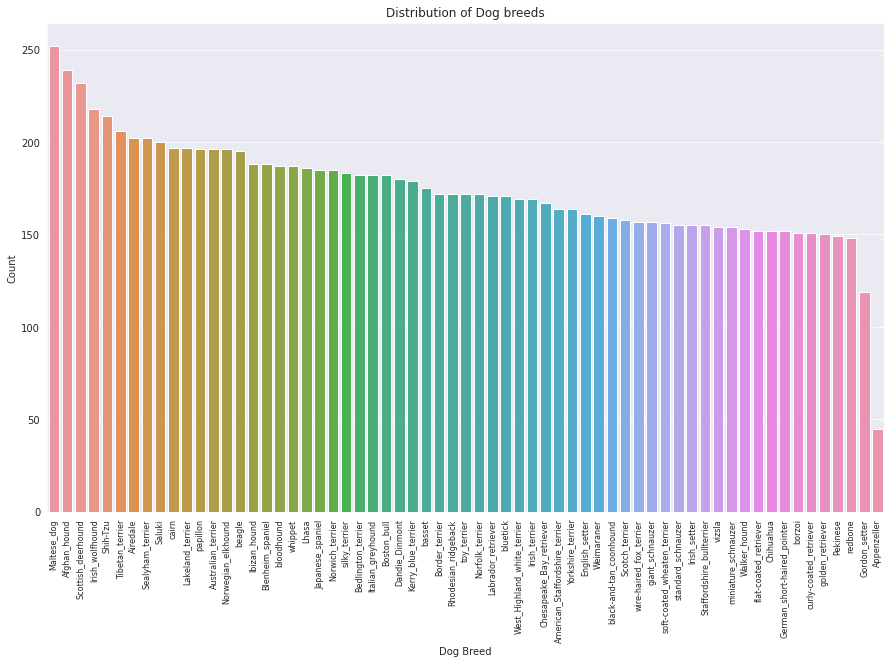

In [99]:
## Plot a barplot for the dog breeds
fig, ax = plt.subplots()
fig.set_size_inches(15, 9)
sns.set_style("darkgrid")
d1 = d.sort_values('Count',ascending=False)
ax = sns.barplot(x = d1.Dog, y = d1.Count, data = d1)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90, fontsize = 8)
ax.set(xlabel='Dog Breed', ylabel='Count')
ax.set_title('Distribution of Dog breeds')
plt.show()

**To see breeds with the most and least amount of pictures**

In [100]:
d1.head(5)
d1.tail(5)

,Dog,Count
0,golden_retriever,150
0,Pekinese,149
0,redbone,148
0,Gordon_setter,119
0,Appenzeller,45


In [101]:

d1.describe()

,Count
count,63.000000
mean,174.238095
std,29.329449
min,45.000000
25%,155.500000
50%,172.000000
75%,188.000000
max,252.000000


In [102]:
## Add the average/max/min for image sizes and how this will affect us
path = '/content/drive/MyDrive/Images/'
mn = 20
ImageDetails = pd.DataFrame()
folders = ([name for name in os.listdir(path)
            if os.path.isdir(os.path.join(path, name)) and name.startswith("")]) # get all directories 
for folder in folders:
  contents = os.listdir(os.path.join(path,folder)) # get list of contents
  folder1 =folder.split("-",1)[1] 
  if len(contents) > mn: # if greater than the limit, print folder and number of contents
    #temp = pd.DataFrame({'Dog': [folder1], 'Count': [len(contents)], })
    for image in contents:
      pic = imageio.imread(path + folder+ "/" + image)
      temp = pd.DataFrame({ 'ID': str(image), 'Breed':folder1 ,'Width': pic.shape[1], 'Height': pic.shape[0],}, index=[0])
      ImageDetails = pd.concat([ImageDetails, temp])
  #print("Folder:" + folder1 + " Complete. ")

In [103]:
print('Summary of image height and width for all of the photos')
ImageDetails.describe()

Summary of image height and width for all of the photos


,Width,Height
count,10977.000000,10977.000000
mean,439.508427,381.892229
std,134.496945,115.094007
min,97.000000,100.000000
25%,360.000000,333.000000
50%,500.000000,375.000000
75%,500.000000,444.000000
max,3264.000000,2448.000000


In [104]:
# See top 10 by height
ImageDetailsHeight = ImageDetails.sort_values('Height',ascending=False)
ImageDetailsHeight.head(10)

,ID,Breed,Width,Height
0,n02085620_4602.jpg,Chihuahua,3264,2448
0,n02093647_2743.jpg,Bedlington_terrier,3264,2448
0,n02088466_9069.jpg,bloodhound,2592,1944
0,n02101006_4223.jpg,Gordon_setter,1388,1879
0,n02093859_1003.jpg,Kerry_blue_terrier,2400,1800
0,n02089867_600.jpg,Walker_hound,2288,1712
0,n02095570_1752.jpg,Lakeland_terrier,2272,1704
0,n02086646_1514.jpg,Blenheim_spaniel,1092,1662
0,n02086646_3670.jpg,Blenheim_spaniel,1584,1660
0,n02100236_804.jpg,German_short-haired_pointer,2448,1632


In [105]:
# See top 10 by width
ImageDetailsWidth = ImageDetails.sort_values('Width',ascending=False)
ImageDetailsWidth.head(10)

,ID,Breed,Width,Height
0,n02085620_4602.jpg,Chihuahua,3264,2448
0,n02093647_2743.jpg,Bedlington_terrier,3264,2448
0,n02088466_9069.jpg,bloodhound,2592,1944
0,n02100236_804.jpg,German_short-haired_pointer,2448,1632
0,n02093859_1003.jpg,Kerry_blue_terrier,2400,1800
0,n02089867_600.jpg,Walker_hound,2288,1712
0,n02095570_1752.jpg,Lakeland_terrier,2272,1704
0,n02087046_7245.jpg,toy_terrier,2080,1544
0,n02099601_6772.jpg,golden_retriever,2048,1360
0,n02088238_9787.jpg,basset,2048,1536


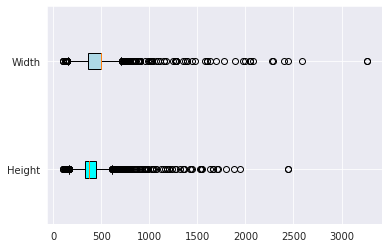

In [106]:
# See distribution of height and width
box_plot_data=[ImageDetails['Height'], ImageDetails['Width']]
box=plt.boxplot(box_plot_data,vert=0,patch_artist=True,labels=['Height','Width'],
 )
colors = ['cyan', 'lightblue']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
 
plt.show()

# Do corrupted images exist in our dataset?

In [107]:

path_to_data = ('/content/drive/MyDrive/Link_2/images')
DIR_IMG = os.path.join(path_to_data, 'images')

def get_filepaths(path_to_data, fileformat='.jpg'):
    """
    Ruturns paths to files of the specified format.  
    """             
    filepaths = list()
    for root, _, finenames in os.walk(path_to_data):
        for fn in finenames:
            if fn.endswith(fileformat):
                filepaths.append(os.path.join(root, fn))                
    return filepaths

def cleaning_worker(path_to_img):
    """
    Verifies whether the image is corrupted.
    """
    std = np.std(mpimg.imread(path_to_img))
    img_ok = not np.isclose(std, 0.0)
    
    return img_ok, path_to_img

# calculate standard deviation of images
imgs_corrupted = list()
with mp.Pool(processes=mp.cpu_count()) as pool:    
    for img_ok, fn in pool.imap_unordered(cleaning_worker, get_filepaths(DIR_IMG)):
        if not img_ok:
            imgs_corrupted.append(fn)

# verify do corrupted images (missing data) exist
print('Corrupted images #:', len(imgs_corrupted))

# clean up the images that aren't OK            
for fn in imgs_corrupted:
    os.remove(fn)

Corrupted images #: 0
